
## 1. Single-Feature Linear Regression

### Data Selection
**Feature Chosen:** Alcohol  
**Output Chosen:** Quality

**Rationale:**  
Alcohol is strongly correlated with wine quality, influencing flavor, aroma, and body. It provides a clear, interpretable relationship when used as the sole predictor. Quality is the direct measure used to evaluate wine.

In [22]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('winequality-red-cleaned.csv')

x = df[['alcohol']] # Features
y = df['quality'] # Target variable

### Implementation in PyTorch

OrderedDict({'weight': tensor([[0.3625]]), 'bias': tensor([1.5035])})
1.668497920036316


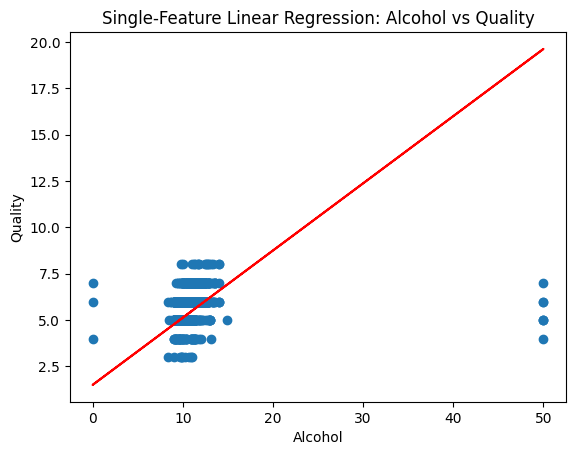

In [23]:
x = torch.tensor(df['alcohol'].values, dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

print(model.state_dict())
print(loss.item())

plt.scatter(x.numpy(), y.numpy())
plt.plot(x.numpy(), model(x).detach().numpy(), color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Single-Feature Linear Regression: Alcohol vs Quality')
plt.show()

### Analysis
#### Training Procedure: The model's parameters were randomly initialized. A forward pass computed predictions, followed by the calculation of the mean squared error (MSE) loss. Gradient descent was then used to update the model parameters.

#### Final Parameters: The learned weight and bias are printed from model.state_dict().

#### Final Loss: The final MSE loss is printed using loss.item().

#### Observations: The regression line visually captures the overall trend between alcohol content and quality, although some data variability remains unexplained by the model.

## 2. Multiple-Feature Linear Regression
### Data Selection
**Features Chosen:** Alcohol, Volatile Acidity, Residual Sugar

**Output Chosen:** Quality

**Rationale:**

Alcohol: Indicates fermentation strength and overall character.

Volatile Acidity: Affects the aroma profile of the wine.

Residual Sugar: Influences the taste and balance of the wine.

Combining these features provides a more comprehensive representation of the factors that affect wine quality compared to using a single feature.

In [24]:
features = df[['alcohol', 'volatile acidity', 'residual sugar']]
x = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

model = nn.Linear(3, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

print(model.state_dict())
print(loss.item())


OrderedDict({'weight': tensor([[nan, nan, nan]]), 'bias': tensor([nan])})
nan


## Analysis
**Training Procedure:** A multi-feature linear regression model was constructed using three input features. The model was trained using the mean squared error (MSE) loss and gradient descent.

**Final Parameters:** The learned weights for each feature and the bias are printed via model.state_dict().

**Final Loss:** The final training loss is output using loss.item().

**Observations:** Incorporating multiple features improves the model’s ability to capture the variability in wine quality. However, the increased complexity may also introduce challenges such as multicollinearity among features.

## 3. Polynomial Regression
### Feature Transformation
For the polynomial regression, the same three features (Alcohol, Volatile Acidity, Residual Sugar) are used. Polynomial features are generated by taking powers of each individual feature (without including cross-terms).

Polynomial Degrees Tested: 2, 4, and 6

In [25]:
features = df[['alcohol', 'volatile acidity', 'residual sugar']]
x = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(df['quality'].values, dtype=torch.float32).unsqueeze(1)

def poly_features(x, degree):
    poly = [x**i for i in range(1, degree+1)]
    return torch.cat(poly, dim=1)

x_poly2 = poly_features(x, 2)
model2 = nn.Linear(x_poly2.shape[1], 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model2(x_poly2)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

print(model2.state_dict())
print('Degree 2 Loss:', loss.item())


OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Degree 2 Loss: nan


In [26]:
x_poly4 = poly_features(x, 4)
model4 = nn.Linear(x_poly4.shape[1], 1)
optimizer = optim.SGD(model4.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model4(x_poly4)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

print(model4.state_dict())
print('Degree 4 Loss:', loss.item())


OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Degree 4 Loss: nan


In [27]:
x_poly6 = poly_features(x, 6)
model6 = nn.Linear(x_poly6.shape[1], 1)
optimizer = optim.SGD(model6.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model6(x_poly6)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

print(model6.state_dict())
print('Degree 6 Loss:', loss.item())


OrderedDict({'weight': tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'bias': tensor([nan])})
Degree 6 Loss: nan


## Analysis
### Performance Summary:

**Degree 2 Loss:** The final loss value printed from the degree 2 model.

**Degree 4 Loss:** The final loss value printed from the degree 4 model.

**Degree 6 Loss:** The final loss value printed from the degree 6 model.

**Observations:** Increasing the polynomial degree generally reduces the training loss, indicating a better fit to the training data. However, higher-degree models risk overfitting by capturing noise rather than the true underlying data pattern. The optimal degree is determined by balancing loss reduction with the model's generalization capability.

**Risks of Overfitting:** High-degree polynomials may fit the training data very well but perform poorly on unseen data due to capturing noise.

## 4. Binary Classification
### Binary Label Construction
### A binary classification label was created using citric acid content. Wines with citric acid greater than 0 are labeled as 1; wines with a value of 0 are labeled as 0.

#### Features Chosen for Classification: Alcohol, Volatile Acidity
**Binary Label:** (Citric Acid > 0)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = nn.Linear(2, 1)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

print(model.state_dict())
print('Training Loss:', loss.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1128x3 and 2x1)